# Aditi Rao 118A2088

Implement k means algorithm on the criminal data collected in various US states. The data contains crimes committed like: assault, murder, and rape in arrests per 100,000 residents in each of the 50 US states in 1973.

1. Analyzing the data in various ways

2. Create and analyze the elbow curve.

3. Find the optimal number of clusters.

4. Minimizing the within-cluster Sum of Squared Errors (SSE), which is also called cluster inertia.

{Hint:

wcss.append (kmeans.inertia_ )

As we used “kmeans.cluster_centers_” and “kmeans.labels_” to get centroids values and labels respectively. Similarly use kmeans.inertia_ to get the WCSS values for different K values.

}

5. Implement K means algorithm.

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving criminal_data.csv to criminal_data.csv


In [4]:
data = pd.read_csv('criminal_data.csv', index_col=0)

In [5]:
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
X = data.iloc[:, 0:5]

In [13]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [15]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [16]:
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
print(wcss)

[200.0, 104.96163315756871, 80.08569526137276, 57.67285241283122, 50.52026552535069, 44.19883452022797, 39.56065659244463, 35.62443020502557, 32.06476119676462, 28.287374612123525]


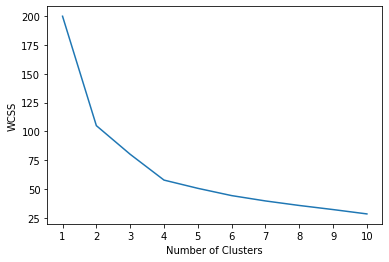

In [17]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++' ,random_state = 1)
y_predict= kmeans.fit_predict(X)  

In [20]:
y_predict

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [21]:
y_predict.max()

3

In [22]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [23]:
kmeans.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [24]:
kmeans.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

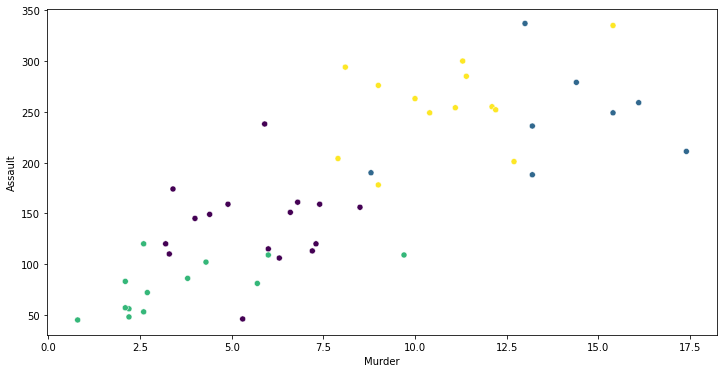

In [25]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Murder'], y = data['Assault'],c=y_predict)